In [5]:
import re
import unicodedata
import pandas as pd
import nltk

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from wordcloud import STOPWORDS

from env import user, password, host

- `background_color`
    - Color of background
- `max_words` 
    - The maximum number of unique words used
- `stopwords` 
    - stopword list
- `max_font_size` 
    - Maximum font size
- `random_state`
    - To ensure that random numbers are generated in the
        - same order, so the results will be the same even if generated several times
- `idth` 
    - width size of the output
- `height` 
    - height size of the output

In [2]:
sentence = "I had heard him for three months without seeing him. The first time I heard it, I thought, as you did, that that adorable voice was singing in another room. I went out and looked everywhere; but, as you know, my dressing-room is very much by itself; and I could not find the voice outside my room, whereas it went on steadily inside. And it not only sang, but it spoke to me and answered my questions, like a real man's voice, with this difference, that it was as beautiful as the voice of an angel. I had never got the Angel of Music whom my poor father had promised to send me as soon as he was dead. I thought that it had finally come, and from that time onward, the voice and I became great friends. It asked leave to give me lessons every day. I agreed and never failed to keep the appointment which it gave me in my dressing-room. You have no idea, though you have heard the voice, of what those lessons were like. We were accompanied by a music which I do not know: it was behind the wall and wonderfully accurate. The voice seemed to understand mine exactly, to know precisely where my father had left off teaching me. In a few weeks' time, I hardly knew myself when I sang. I was even frightened. I seemed to dread a sort of witchcraft behind it. My progress, by the voice's own order, was kept a secret. It was a curious thing, but, outside the dressing-room, I sang with my ordinary, every-day voice and nobody noticed anything. I did all that the voice asked. It said, `Wait and see: we shall astonish Paris!' And I waited and lived on in a sort of ecstatic dream. It was then that I saw you for the first time one evening, in the house. I was so glad that I never thought of concealing my delight when I reached my dressing-room. Unfortunately, the voice was there before me and soon noticed, by my air, that something had happened. It asked what was the matter and I saw no reason for keeping our story secret or concealing the place which you filled in my heart. Then the voice was silent. I called to it, but it did not reply; I begged and entreated, but in vain. I was terrified lest it had gone for good. I wish to Heaven it had!"

### No customizations:

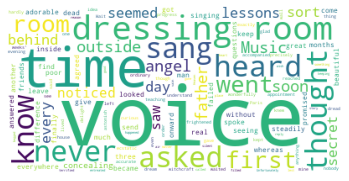

In [3]:
img = WordCloud(background_color='white').generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.show()

### Adding in stopwords, max words, font size

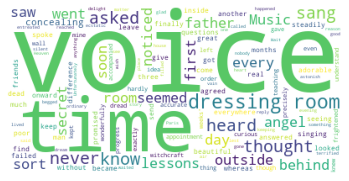

In [6]:
img = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42).generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.show()

### Edit the Height and width of Visual

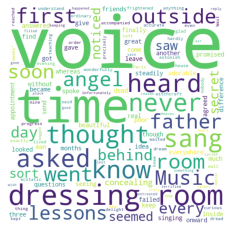

In [7]:
img = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500).generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.show()



### Custom Fonts

You can download fonts from the site https://www.dafont.com for personal use.

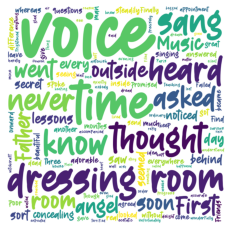

In [8]:
font_path = '/Users/caitlyncarney/fonts/matcha_latte/Matcha_Latte.ttf'
img = WordCloud(background_color="white", font_path=font_path, 
                max_words=2000, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=800, height=800).generate(sentence)
# WordCloud() produces an image object, which can be displayed with plt.imshow
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
plt.show()

### Change the Shape

In [9]:
from PIL import Image
import numpy as np

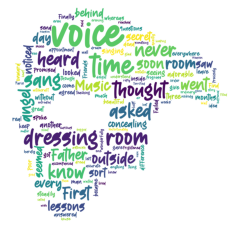

In [10]:
mask = np.array(Image.open('/Users/caitlyncarney/masks/opera.jpg'))
img = WordCloud(background_color="white", font_path=font_path, mask=mask, 
                max_words=2000, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=800, height=800).generate(sentence)
plt.imshow(img)

plt.axis('off')
plt.show()

### Adjusting Colors

To create new colors you will have to create new funcitons.

- For the first fucntion type we will be looking at making just one color but with different color intensities.

To choose colors use: `hsl(255, 80%%, %d%%)`
   - 255
       - controls the color
   - 80%
       - controls brightness

In [11]:
import random

In [12]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

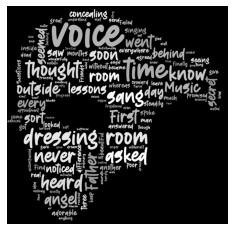

In [13]:
mask = np.array(Image.open('/Users/caitlyncarney/masks/opera.jpg'))
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=2000, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=800, height=800, 
                color_func=grey_color_func).generate(sentence)
plt.imshow(img)

plt.axis('off')
plt.show()

In [22]:
def purple_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(255, 80%%, %d%%)" % random.randint(40, 100)

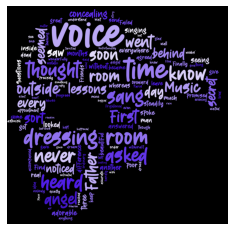

In [23]:
mask = np.array(Image.open('/Users/caitlyncarney/masks/opera.jpg'))
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=2000, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=800, height=800, 
                color_func=purple_color_func).generate(sentence)
plt.imshow(img)

plt.axis('off')
plt.show()

### Multi Colors Instead of One Color

For colors you need to actually create the colors.
- Use this website so you dont have to mix colors in code
    - https://www.rapidtables.com/web/color/RGB_Color.html#color-table

`colors = [[a,b,c],[a,b,c],[a,b,c]]`
              
represents the light wave length
- a = wavelength in nano meters
    - color
- b = color intensity
- c = brightness

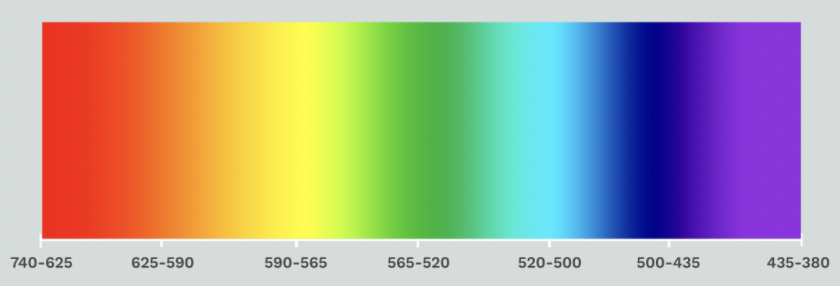

In [94]:
def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[7,255,239],
              [7,255,239],
              [49,255,7]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

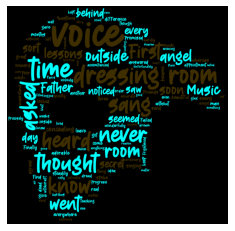

In [95]:
mask = np.array(Image.open('/Users/caitlyncarney/masks/opera.jpg'))
img = WordCloud(background_color="black", font_path=font_path, mask=mask, 
                max_words=2000, stopwords=STOPWORDS, max_font_size=256,
                random_state=42, width=800, height=800, 
                color_func=multi_color_func).generate(sentence)
plt.imshow(img)

plt.axis('off')
plt.show()